# **Fragment length frequency**

First we read in the file and compute fragment length for each data instance:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("query.bed", sep="\t", header=None, low_memory=False)
df["fragment_length"] = df[2] - df[1]

df.head()

,0,1,2,3,4,5,fragment_length
0,chr10,32795245,32795315,70,.,+,70
1,chr11,95864728,95864770,42,.,+,42
2,chr16,32027808,32027880,72,.,+,72
3,chr4,76608451,76608515,64,.,+,64
4,chr18,45847777,45847816,39,.,-,39


Next we find the frequencies of each fragment length and normalize it:

In [2]:
length_counts = [0 for _ in range(701)]

for length in df["fragment_length"].values:
    length_counts[length] += 1

total = sum(length_counts)
normalized_length_counts = [count / total for count in length_counts]

Then we plot:

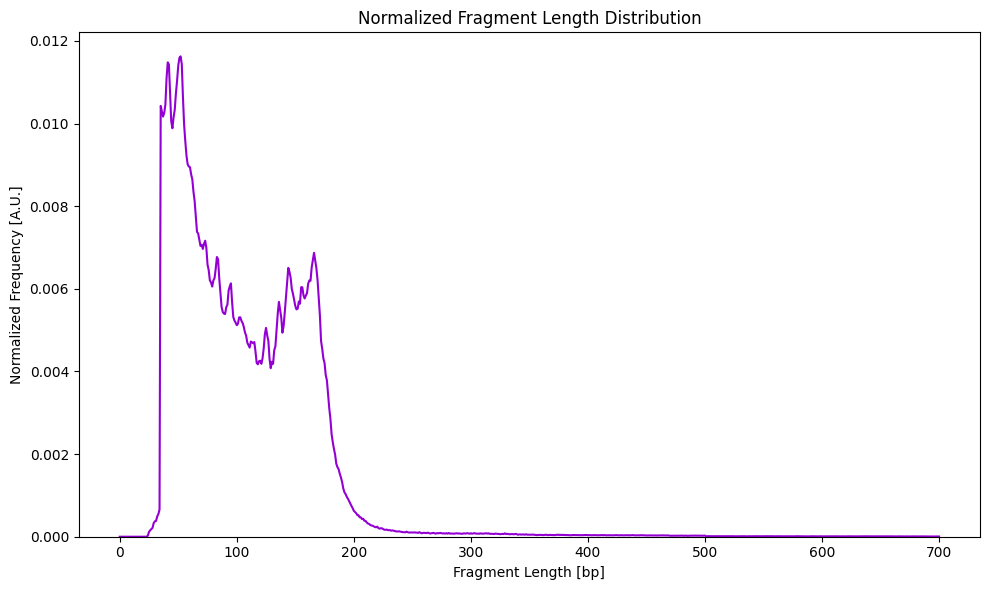

In [3]:
x = [i for i in range(701)]
y = [normalized_length_counts[i] for i in range(701)]

plt.figure(figsize=(10, 6))
plt.plot(x, y, color='darkviolet')
plt.xlabel("Fragment Length [bp]")
plt.ylabel("Normalized Frequency [A.U.]")
plt.title("Normalized Fragment Length Distribution")
plt.ylim(bottom=0)
plt.margins(y=0)
plt.tight_layout()
plt.show()

# **Rescaling**



First we read the reference data:

In [4]:
df1 = pd.read_csv("reference.hist", sep="\t", header=None)
df1.head()

,0,1
0,24,0.000013
1,25,0.000063
2,26,0.000092
3,27,0.000117
4,28,0.000136


Now for sampling data, we weight data points as follows: the weight of each $i$ for $0 \le i \le 700$ is product of reference distribution of $i$ and query distribution of $i$. Then we sample 5,000,000 times with replacement to get sampled data:  

In [5]:
import numpy as np

ref_values = df1[1].values
data = np.array(range(701))
weights = [0 for _ in range(701)]

for i in range(24, 701):
    weights[i] = float(ref_values[i-24])

for i in range(701):
    weights[i] *= normalized_length_counts[i]

weights = np.array(weights)
prob = weights / weights.sum()
sampled = np.random.choice(data, size=5000000, replace=True, p=prob)

Then from sampled data, we again do the same thing - find frequencies of each length and then normalize:

In [6]:
length_counts1 = [0 for _ in range(701)]

for length in sampled:
    length_counts1[length] += 1

total1 = sum(length_counts1)
normalized_length_counts1 = [count / total1 for count in length_counts1]

Then we plot:

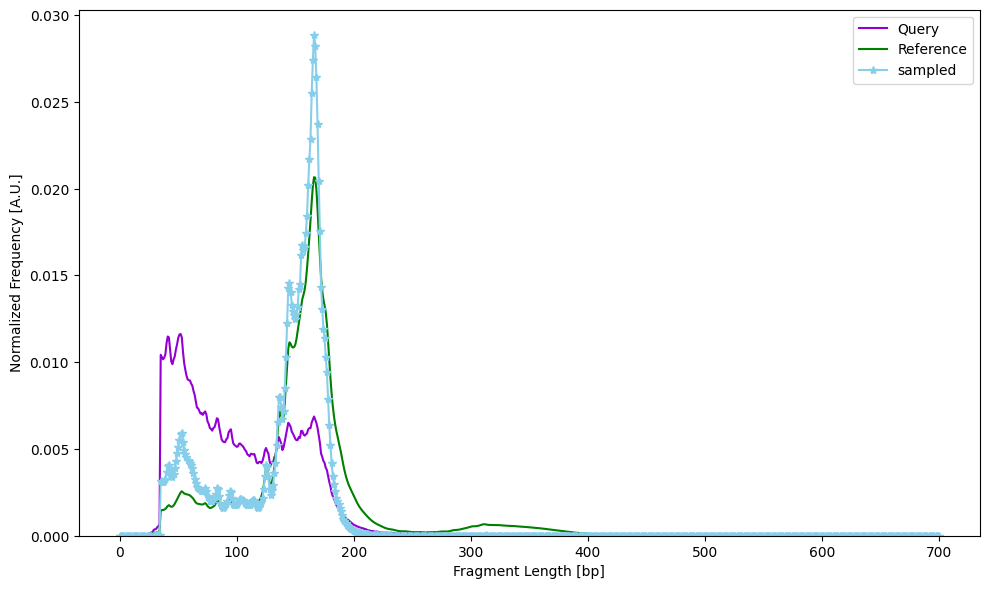

In [7]:
x1 = [i for i in range(701)]
y1 = [normalized_length_counts1[i] for i in range(701)]

plt.figure(figsize=(10, 6))
plt.plot(x, y, color='darkviolet', label='Query')
plt.plot(df1[0].values, df1[1].values, color='green', label='Reference')
plt.plot(x1, y1, marker='*', color='skyblue', label='sampled')
plt.xlabel("Fragment Length [bp]")
plt.ylabel("Normalized Frequency [A.U.]")
plt.ylim(bottom=0)
plt.margins(y=0)
plt.tight_layout()
plt.legend()
plt.show()